### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import random

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.isnull().sum(axis=0)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# The most missing value is from the Car. So I decided to drop that column since there are 108 values filled.
data = data.drop('car', axis=1)

For the rest of the columns, drop the rows with a missing value in any of their columns.

In [8]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [9]:
data = data.dropna()

In [10]:
data.shape

(12079, 25)

4. What proportion of the total observations chose to accept the coupon? 



In [11]:
accept_portion = len(data[data['Y'] == 1]) / len(data)
accept_portion

0.5693352098683666

Around %57 of the dataset accepted the coupon.

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Different coupon counts')

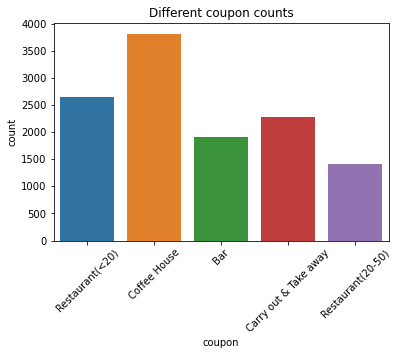

In [79]:
sns.countplot(data=data, x='coupon')
plt.xticks(rotation=45)
plt.title('Different coupon counts')

In [ ]:
# Same barplot but this time using matplotlib
coupons = data['coupon'].value_counts()
plt.bar(coupons.index, coupons.values)
plt.title('Different coupon counts')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

In [ ]:
sns.displot(data, x='temperature')

Since the temperature can just take 3 different values, histogram may not be the best form of representation.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar_df = data[data['coupon'] == 'Bar']
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [14]:
accepted_bar_coupons_ratio = len(bar_df[bar_df['Y'] == 1]) / len(bar_df)
accepted_bar_coupons_ratio

0.41191845269210664

**Answer:** Approximately %41 of the bar coupons were accpeted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
# First find all the values in the Bar columns
bar_df['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [16]:
# Based on the values, people who went to bar more than 3 times are 4~8 and gt8 and the rest of the data went to the bar 3 times or fewer
# First get the acceptance rate of people who went to a bar more than 3 times
acc_rate_more_3 = len(bar_df[(bar_df['Y'] == 1) & (bar_df['Bar'].isin(['4~8', 'gt8']))]) / len(bar_df[bar_df['Bar'].isin(['4~8', 'gt8'])])
print(f"Acceptance rate for those who went to a bar more than 3 times: %{acc_rate_more_3 * 100}")

Acceptance rate for those who went to a bar more than 3 times: %76.16580310880829


In [17]:
# Now for the rest of the people who went to a bar 3 or fewer times
fewer_3 = ['never', 'less1', '1~3']
acc_rate_fewer_3 = len(bar_df[(bar_df['Y'] == 1) & (bar_df['Bar'].isin(fewer_3))]) / len(bar_df[bar_df['Bar'].isin(fewer_3)])
print(f"Acceptance rate for those who went to a bar 3 times: %{acc_rate_fewer_3 * 100}")

Acceptance rate for those who went to a bar 3 times: %37.26744186046512


**Answer:** According to the percentages, people who went to a bar more than 3 times are more likely to accept the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
print(bar_df['age'].dtype)
bar_df['age'].value_counts()

object


21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: age, dtype: int64

The age field is of type object and it is actually string. Therefore, it is better to convert the values to integer first to be able to find all the values above 25. To do so, I do a data cleaning by replacing 50plus with 51 and below21 with 20. In that case, when I want to filter the data based on the age > 25, I will get the correct result.

In [19]:
bar_df['age'] = bar_df['age'].map(lambda x: 20 if x == 'below21' else x)
bar_df['age'] = bar_df['age'].map(lambda x: 51 if x == '50plus' else x).astype(int)
print(bar_df['age'])

24       21
35       21
39       21
46       46
57       46
         ..
12663    26
12664    26
12667    26
12670    26
12682    26
Name: age, Length: 1913, dtype: int32


C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_15668\1608570590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['age'] = bar_df['age'].map(lambda x: 20 if x == 'below21' else x)
C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_15668\1608570590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['age'] = bar_df['age'].map(lambda x: 51 if x == '50plus' else x).astype(int)


In [20]:
more_than_once = ['1~3', '4~8', 'gt8']
more_than_once_over_twentyfive_df = bar_df.query('age > 25 & Bar in @more_than_once')
# print(more_than_once_over_twentyfive_df.head())
others_df = bar_df.query('age <= 25 | Bar not in @more_than_once')
# print(others_df.head())

In [21]:
acceptance_rate = len(more_than_once_over_twentyfive_df.query('Y == 1')) / len(more_than_once_over_twentyfive_df)
print(f"acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: %{acceptance_rate * 100}")

acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: %68.98263027295285


In [22]:
acceptance_rate_others = len(others_df.query('Y == 1')) / len(others_df)
print(f"acceptance rate of other drivers: %{acceptance_rate_others * 100}")

acceptance rate of other drivers: %33.77483443708609


**Answer:** Drivers who go to a bar more than once a month and are over 25 years old accept the coupon more than twice the drivers who are 25 or younger or go to a bar less than 1 times in a month.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [23]:
# First look at the values
df1 = bar_df[bar_df['Bar'].isin(['never', 'less1'])] # df1 has all drivers who go to bars more than once a month
df1 = df1[df1['passanger'] != 'Kid(s)'] # df1 has passangers who are not kid(s)
df1 = df1[df1['occupation'] != 'Farming Fishing & Forestry'] # df1 occupation is not farming, fishing, or forestry

# Now df1 meets all the criteria mentioned
acceptance_rate_df1 = len(df1[df1['Y'] == 1]) / len(df1)
print(f"acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: %{acceptance_rate_df1 * 100}")

acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: %31.191885038038887


In [24]:
# to practice both filtering and querying, I use query for this part
less_than_one_bar_visit = ['never', 'less1']
df_others = bar_df.query('Bar not in @less_than_one_bar_visit | passanger != "Kid(s)" | occupation != "Farming Fishing & Forestry"')

acceptance_rate_other = len(df_others.query('Y == 1')) / len(df_others)
print(f"acceptance rate of other drivers: %{acceptance_rate_other * 100}")

acceptance rate of other drivers: %41.20418848167539


**Answer:** The others have higher rate of acceptance for the coupon.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [25]:
data['coupon'].value_counts()

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

In [26]:
data['RestaurantLessThan20'].value_counts()

1~3      5163
4~8      3450
less1    2005
gt8      1285
never     176
Name: RestaurantLessThan20, dtype: int64

In [27]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
df1 = bar_df.query('Bar not in @less_than_one_bar_visit & passanger != "Kid(s)" & maritalStatus != "widowed"')
acc1 = len(df1.query('Y == 1')) / len(df1)
print(f"Acc rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed: % {acc1 * 100}")

# go to bars more than once a month and are under the age of 30
df2 = bar_df.query('Bar not in @less_than_one_bar_visit & age < 30')
acc2 = len(df2.query('Y == 1')) / len(df2)
print(f"Acc rate for go to bars more than once a month and are under the age of 30: % {acc2 * 100}")

# go to cheap restaurants more than 4 times a month and income is less than 50K
income_less_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
cheap_rest_more_4 = ['4~8', 'gt8']
df3 = bar_df.query('income in @income_less_50k & RestaurantLessThan20 in @cheap_rest_more_4')
acc3 = len(df3.query('Y == 1')) / len(df3)
print(f"Acc rate go to cheap restaurants more than 4 times a month and income is less than 50K: % {acc3 * 100}")

Acc rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed: % 70.94339622641509
Acc rate for go to bars more than once a month and are under the age of 30: % 71.95121951219512
Acc rate go to cheap restaurants more than 4 times a month and income is less than 50K: % 45.645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Answer:** Based on the acceptance rate result of the previous problem, drivers who are under age of 30 and go to bar more than once a months accepted the coupon more than other two groups. Overall, it shows that if the driver has the history of going to bar at least once a month, the acceptance rate of bar coupon is higher.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's look at all the coupons available in the dataset and try to find what percentage of coupons are being accepted.

In [30]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

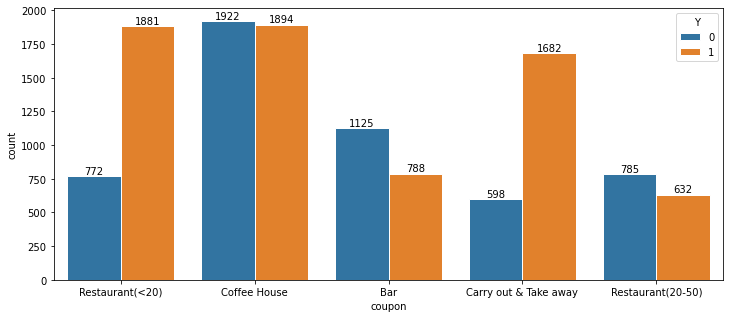

In [57]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=data, x='coupon', hue='Y', edgecolor='w')
for container in ax.containers:
    ax.bar_label(container)

This plot depicts that cheaper restaurants and carry outs & take aways have higher number of accepted restaurant compraing to their rejected coupons. On the contrary, the number of rejected coupons are higher for other types of businesses. It be observed that coffe Houses have higher number of coupons with total of 3816 (1922 + 1894) among all the businesses. 

Now, I would like further investigate Coffee Houses to find out which factors have impact on accepting or rejecting a coupon.

In [69]:
coffee_house_df = data[data['coupon'] == 'Coffee House']
coffee_house_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [71]:
coffee_house_df['weather'].value_counts()

Sunny    3316
Snowy     285
Rainy     215
Name: weather, dtype: int64

In [97]:
coffee_house_df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<AxesSubplot:xlabel='weather', ylabel='count'>

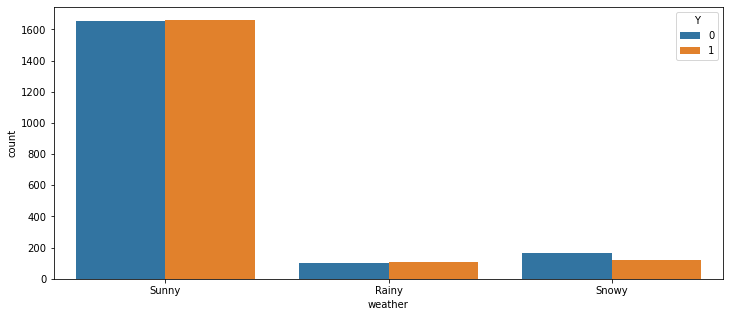

In [72]:
plt.figure(figsize=(12, 5))
sns.countplot(data=coffee_house_df, x='weather', hue='Y')

In [95]:
weather_type = coffee_house_df['weather'].value_counts()
weather_type
px.pie(weather_type, values=weather_type.values, names=weather_type.index)

#### Does the type of passanger affects the acceptance rate of the coffee house coupon?

In [99]:
coffee_house_df['passanger'].value_counts()

Alone        2157
Friend(s)    1175
Partner       291
Kid(s)        193
Name: passanger, dtype: int64

In [104]:
# sns.countplot(data=coffee_house_df, x='passanger', hue='Y')
px.histogram(coffee_house_df, x='passanger', color='Y', barmode='group')

In [114]:
acceptance_rate_df = coffee_house_df.groupby('passanger')[['Y']].sum() / coffee_house_df.groupby('passanger')[['Y']].count()
acceptance_rate_df.rename(columns={'Y': 'Acceptance Rate'}, inplace=True)
acceptance_rate_df

,Acceptance Rate
passanger,
Alone,0.433936
Friend(s),0.597447
Kid(s),0.471503
Partner,0.567010


Based on the acceptance rate calculated, when the driver is alone the acceptance rate is the lowest. On the other hand, when the driver has a friend or partner companying them during a ride, the acceptance rate is the highest. Based on this observation, I woul like to see when the a friend or partner is on the ride, what other factors impacts the accepting/rejecting a coupon.

In [119]:
coffee_house_friend_df = coffee_house_df[coffee_house_df['passanger'] == 'Friend(s)']
px.histogram(coffee_house_friend_df, x='time', color='Y', barmode='group')

Let's look at the data when the driver is alone. Does the time of the day affect the acceptance?

In [120]:
coffee_house_alone_df = coffee_house_df[coffee_house_df['passanger'] == 'Alone']
px.histogram(coffee_house_alone_df, x='time', color='Y', barmode='group')